In [1]:
#import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#connect MongoClient to default port
mongo = MongoClient(port=27017)

In [3]:
#list mongoDB database names
print(mongo.list_database_names())

['admin', 'config', 'local', 'my_database']


In [4]:
#define the 'my_database' database in Mongo
db = mongo['my_database']

In [5]:
#list collection
print(db.list_collection_names())

['nps_data']


In [6]:
#define 'nps_data' collection 
nps_data = db['nps_data']

In [7]:
#count number of documents found in collection
nps_data.count_documents({})

470

In [8]:
#pretty print and display contents of a document
pprint(db.nps_data.find_one())

{'_id': ObjectId('64bda0d2117a192e0d47b9aa'),
 'activities': [{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238',
                 'name': 'Astronomy'},
                {'id': 'D37A0003-8317-4F04-8FB0-4CF0A272E195',
                 'name': 'Stargazing'},
                {'id': '1DFACD97-1B9C-4F5A-80F2-05593604799E', 'name': 'Food'},
                {'id': 'C6D3230A-2CEA-4AFE-BFF3-DC1E2C2C4BB4',
                 'name': 'Picnicking'},
                {'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3',
                 'name': 'Guided Tours'},
                {'id': 'A0631906-9672-4583-91DE-113B93DB6B6E',
                 'name': 'Self-Guided Tours - Walking'},
                {'id': '42FD78B9-2B90-4AA9-BC43-F10E9FEA8B5A',
                 'name': 'Hands-On'},
                {'id': 'DF4A35E0-7983-4A3E-BC47-F37B872B0F25',
                 'name': 'Junior Ranger Program'},
                {'id': '0B685688-3405-4E2A-ABBA-E3069492EC50',
                 'name': 'Wildlife Watching'},
                

In [9]:
#identify number of unique designations and list them
unique_designations = db.nps_data.distinct('designation')

print("Number of unique designations:", len(unique_designations))
print("Unique designations:", unique_designations)

Number of unique designations: 47
Unique designations: ['', 'Affiliated Area', 'Ecological & Historic Preserve', 'International Historic Site', 'International Park', 'Memorial', 'Memorial Parkway', 'National Battlefield', 'National Battlefield Park', 'National Battlefield Site', 'National Geologic Trail', 'National Historic Area', 'National Historic Site', 'National Historic Trail', 'National Historical Park', 'National Historical Park and Ecological Preserve', 'National Historical Park and Preserve', 'National Historical Reserve', 'National Lakeshore', 'National Memorial', 'National Military Park', 'National Monument', 'National Monument & Preserve', 'National Monument and Historic Shrine', 'National Park', 'National Park & Preserve', 'National Parks', 'National Preserve', 'National Recreation Area', 'National Recreational River', 'National Reserve', 'National River', 'National River & Recreation Area', 'National Scenic River', 'National Scenic Riverway', 'National Scenic Riverways', 

In [10]:
#aggregate and group designation with its count
results = db.nps_data.aggregate([
    {"$group": {"_id": "$designation", "count": {"$sum": 1}}}
])


In [11]:
#create new df using the results from above
designation_df = pd.DataFrame(results)

In [12]:
#rename df columns
designation_df = designation_df.rename(columns={"count": "Count",
                                              "_id": "Designations"})
#display changes to df
designation_df

,Designations,Count
0,National Scenic Trail,6
1,National Historical Park and Ecological Preserve,1
2,Scenic & Recreational River,1
3,National Historic Trail,18
4,Park,11
5,National Scenic Riverways,1
6,National Monument and Historic Shrine,1
7,National River,1
8,,36
9,National Park,51


In [13]:
#replace blank space within df in the Designations column with "Unknown"
designation_df['Designations'] = designation_df['Designations'].replace(r'^\s*$', 'Unknown', regex=True)

designation_df

,Designations,Count
0,National Scenic Trail,6
1,National Historical Park and Ecological Preserve,1
2,Scenic & Recreational River,1
3,National Historic Trail,18
4,Park,11
5,National Scenic Riverways,1
6,National Monument and Historic Shrine,1
7,National River,1
8,Unknown,36
9,National Park,51


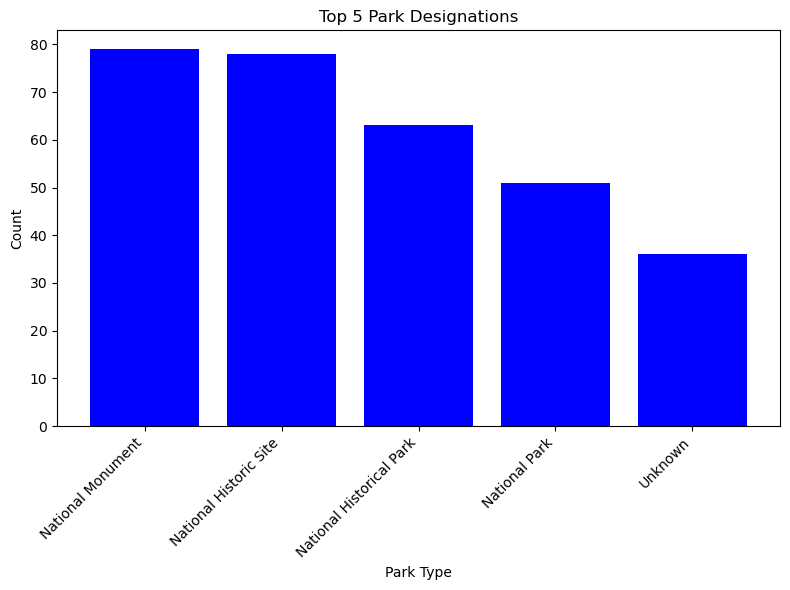

In [14]:
#using the df from above create bar chart with top 5 designations
designation_df.sort_values(by="Count", ascending=False, inplace=True)

# Select top 5 designations
top_5_designations = designation_df.head(5)

# Create the bar chart for the top 5 designations
plt.figure(figsize=(8, 6))
plt.bar(top_5_designations["Designations"], top_5_designations["Count"], color="blue")

# Set axis labels and title
plt.xlabel("Park Type")
plt.ylabel("Count")
plt.title("Top 5 Park Designations")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right")

# Save the chart as an image
plt.tight_layout()
plt.savefig("Top5ParkDesignationsChart.png")

# Show the plot
plt.show()



In [15]:
#create pipeline to group designation, acitivity names, and count of total activities for each designation
pipeline = [
    {
        "$unwind": "$activities"
    },
    {
            "$group": {
            "_id": "$designation",
            "ActivityName": {"$push": "$activities.name"},
            "Count": {"$sum": 1}
        
        }
    }

]

results2 = db.nps_data.aggregate(pipeline)

In [16]:
#create new df from above results
designation_df2 = pd.DataFrame(results2)

print("Rows in DataFrame: ", len(designation_df2))
designation_df2

Rows in DataFrame:  47


,_id,ActivityName,Count
0,Parkway,"[Auto and ATV, Scenic Driving, Arts and Cultur...",41
1,Memorial,"[Guided Tours, Self-Guided Tours - Walking, Ar...",24
2,National Seashore,"[Arts and Culture, Auto and ATV, Auto Off-Road...",264
3,National Preserve,"[Camping, Backcountry Camping, Dog Sledding, F...",221
4,National Reserve,"[Auto and ATV, Scenic Driving, Astronomy, Star...",41
5,Part of Statue of Liberty National Monument,"[Food, Dining, Picnicking, Guided Tours, Self-...",11
6,National Recreational River,"[Auto and ATV, Scenic Driving, Astronomy, Star...",44
7,International Park,[Museum Exhibits],1
8,National Lakeshore,"[Boating, Motorized Boating, Sailing, Boat Tou...",102
9,National Monument & Preserve,"[Camping, Backcountry Camping, Climbing, Mount...",58
